# Project 03
### Paola M. Hunt

In [1]:
import numpy as np
import math as m 
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
In this section, I will create and test a function to generate sequences of simulated daily stock prices.


In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5), size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(daily_multipliers*start ,2)
    daysplus1 = np.concatenate((np.array([start]), daily_prices))
    
    return daysplus1
    
    

I will now test the function to see that it works properly.

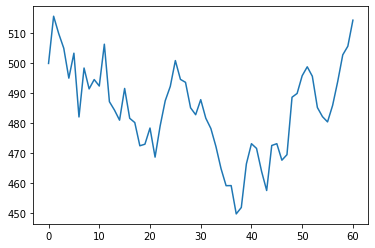

[500.   515.75 509.98 505.08 495.1  503.42 482.15 498.47 491.51 494.63
 492.47 506.42 487.24 484.43 481.08 491.66 481.7  480.28 472.53 473.06
 478.45 468.75 479.15 487.54 492.35 500.96 494.69 493.7  485.2  482.9
 487.92 481.74 478.29 472.27 464.93 459.22 459.25 449.8  451.94 466.49
 473.23 471.66 463.97 457.61 472.63 473.23 467.72 469.56 488.73 489.99
 495.9  498.88 495.73 485.29 482.25 480.5  486.01 493.94 502.87 505.75
 514.44]


In [3]:
np.random.seed(1)
stock60 = simulate_stock(500, 0.08, 0.3, 60)

plt.plot(stock60)
plt.show()

print(stock60)

## Part B: Annual Yield Function
In this section, I will create and test a function that takes a simulated run as its input, and calculates the annual yield for that particular run.

In [4]:
def find_yield(run):
    annual_yield = m.log((run[len(run)-1])/(run[0]))*((252)/((len(run))-1))
    return np.round(annual_yield,4)

I will now test the function to see that it works properly by running it on the previously simulated run.

In [5]:
find_yield(stock60)

0.1196

This next cell will explore the potential variability in the simulated runs by creating and plotting 25 simulated runs.

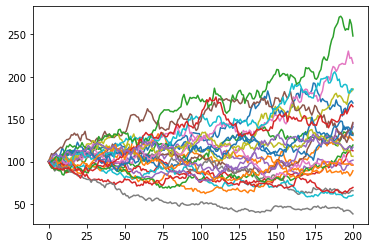

In [6]:
run25yields = []
for i in range(0, 25):
    run25 = simulate_stock(100, 0.06, 0.4, 200)
    
    plt.plot(run25)
    
    sim_yield = find_yield(run25)
    run25yields.append(sim_yield)
    

In the next cell, I will display the yields for the 25 simulated runs.

In [7]:
print(run25yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
The purpose of this section is to give me some experience working with seeds. Through trial-and-error, I will try to find seeds that result in specific outcomes.


In the cell below, Stock A has the highest simulated final price.

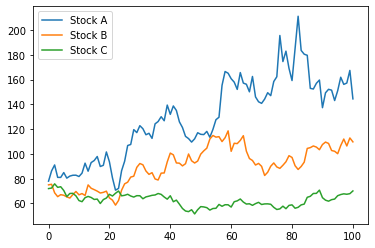

In [8]:
np.random.seed(10)

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_A, label='Stock A')
plt.plot(stock_B, label='Stock B')
plt.plot(stock_C, label='Stock C')

plt.legend()
plt.show()


In the cell below, Stock B has the highest simulated final price.

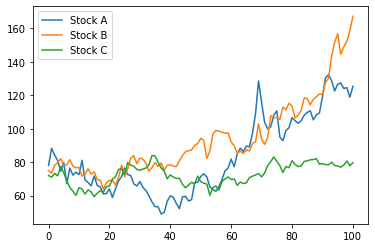

In [9]:
np.random.seed(1)

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_A, label='Stock A')
plt.plot(stock_B, label='Stock B')
plt.plot(stock_C, label='Stock C')

plt.legend()
plt.show()


In the cell below, Stock C has the highest simulated final price.

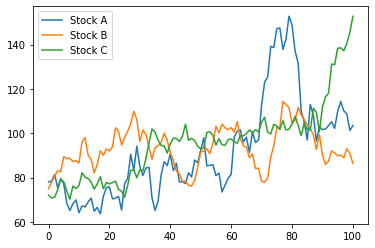

In [10]:
np.random.seed(4)

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_A, label='Stock A')
plt.plot(stock_B, label='Stock B')
plt.plot(stock_C, label='Stock C')

plt.legend()
plt.show()


## Part D: Monte Carlo Simulation
In this section, I will use the Monte Carlo Simulation to estimate the probabilities relating to the outcome of a certain event.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for i in range(0, num_runs):
        runmc = simulate_stock(start, rate, vol, days)
        final_prices.append(runmc[len(runmc)-1])
        annual_yields.append(find_yield(runmc))
    
    final_prices = np.array([final_prices])
    annual_yields = np.array([annual_yields])
    
    return final_prices, annual_yields
    

Next, I will test my function by running a Monte Carlo simulation with a specific seed.

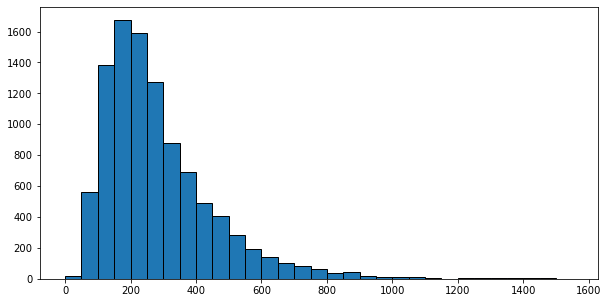

In [12]:
np.random.seed(1)

mcrun = monte_carlo(200, 0.10, 0.4, 500, 10000)

final_prices = list(mcrun[0])

plt.figure(figsize=[10,5])
plt.hist(final_prices, edgecolor='k', bins=np.arange(0, 1600, 50))
plt.show()


I will now display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [13]:
percentiles = np.array([10,25,50,75,90])
price_percentiles = np.round(np.percentile(final_prices, percentiles),2)
print(f'{percentiles[0]}th percentile: {price_percentiles[0]}\n{percentiles[1]}th percentile: {price_percentiles[1]}\n{percentiles[2]}th percentile: {price_percentiles[2]}\n{percentiles[3]}th percentile: {price_percentiles[3]}\n{percentiles[4]}th percentile: {price_percentiles[4]}')
      
      
      

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
In this part, I will explore the effect of volatility on simulated stock prices. I will do this by performing two Monte Carlo simulations. The two simulations will use different volatilities, but will use the same parameters.

In [14]:
np.random.seed(1)

Stock_A = monte_carlo(100, 0.12, 0.3, 150, 10000)
Stock_B = monte_carlo(100, 0.12, 0.7, 150, 10000)
meanyieldA = np.round(np.mean(Stock_A[1]),4)
meanyieldB = np.round(np.mean(Stock_B[1]),4)

print( f'Average Annual Yield for A over 10000 runs: {meanyieldA}',
     f'\nAverage Annual Yield for B over 10000 runs: {meanyieldB}')


Average Annual Yield for A over 10000 runs: 0.1218 
Average Annual Yield for B over 10000 runs: 0.1128


Next, I will visually inspect the results of the two Monte Carlo simulations by plotting histograms of the final prices.

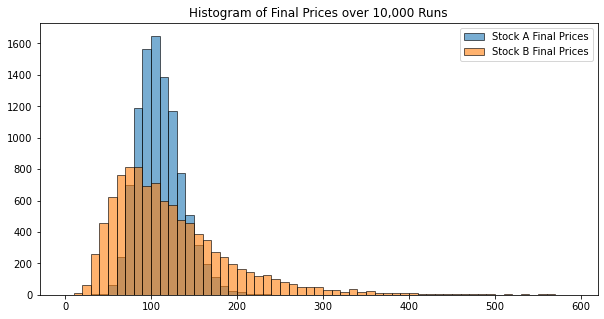

In [15]:
plt.figure(figsize=[10,5])

plt.hist(list(Stock_A[0]), 
         edgecolor='k', 
         label='Stock A Final Prices', 
         alpha=0.6,
         bins=np.arange(0,600, 10)
        )
plt.hist(list(Stock_B[0]), 
         edgecolor='k', 
         label='Stock B Final Prices', 
         alpha=0.6, 
         bins=np.arange(0,600, 10)
        )

plt.legend()
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.show()


## Part F: Comparing Two Stocks
In this section, I will use the Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with different parameters.

In [16]:
np.random.seed(1)

StockA = monte_carlo(120, 0.08, 0.2, 252, 10000)
StockB = monte_carlo(120, 0.05, 0.5, 252, 10000)

StockA_finalPrice = StockA[0][len(StockA[0])-1]
StockB_finalPrice = StockB[0][len(StockB[0])-1]

prop1 = np.round((np.mean(StockA_finalPrice>StockB_finalPrice)),4)
prop2 = np.round((np.mean(StockA_finalPrice>150)),4)
prop3 = np.round((np.mean(StockB_finalPrice>150)),4)
prop4 = np.round((np.mean(StockA_finalPrice<100)),4)
prop5 = np.round((np.mean(StockB_finalPrice<100)),4)

print('Proportions of runs in which...','\n','-'*31, sep='')
print(f'A ends above B: {prop1:>10} \n\nA ends above 150: {prop2:>8} \nB ends above 150: {prop3:>8} \n\nA ends below 100: {prop4:>7} \nB ends below 100: {prop5:>8}')

Proportions of runs in which...
-------------------------------
A ends above B:     0.5206 

A ends above 150:   0.2338 
B ends above 150:   0.3619 

A ends below 100:   0.095 
B ends below 100:   0.3195


## Part G: Expected Call Payoff
In this part, I will use Monte Carlo to estimate the expected payoff of a call on a particular stock.

In [17]:
np.random.seed(1)

call = monte_carlo(200, 0.11, 0.4, 150, 10000)
expected_payoff_run = call[0] - 225
expected_payoff = np.where((expected_payoff_run)>0, expected_payoff_run, 0)

print(round(np.mean(expected_payoff),2))


27.1
